In [1]:
import numpy as np
import pandas as pd
import gc
from multiprocessing import Pool
import cmasher as cmr
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=Warning) 

In [2]:
path_csv = "/media/temp/bego/snapshots_resim/"
path_datos = "/home/bego/GARROTXA_copia/datos_GARROTXA_resim/"
path_results = "/home/bego/GARROTXA/GalaDyn/results/"
path_crossmatch = "/home/bego/GARROTXA/satelites_crossmatch/"
path_figures_acceleration = "/home/bego/GARROTXA/aceleration_figures/"
path_figures = "/home/bego/GARROTXA/acceleration_figures/"
path_acceleration = "/home/bego/GARROTXA/acceleration/"
path_disk = "/home/bego/GARROTXA/disco/"

In [3]:
def process_data_to_plot(data, modo, nbins=22):
    arr_z = np.array(data[f"amp{modo}"]/data["Nparticles"])
    amp = arr_z.reshape(-1, nbins)
    arr_z = np.array(data[f"phase{modo}"])
    phase = arr_z.reshape(-1, nbins)
    return data["lookbacktime"][::nbins], data["Rcenters"][0:nbins], np.log10(amp.T), phase.T
    

In [4]:
def plot_modos_fourier (data,index, vmin, vmax, etiqueta, nbins):
    #fig, ax = plt.subplots(nrows=2,ncols =3 , sharex = True,sharey = True,  figsize=(20,5))
    lookback, rcenters, amplitude, phase = process_data_to_plot(data,modo=1, nbins=nbins)
    im0 = ax[2*index,0].pcolormesh(lookback,rcenters,amplitude,vmin = vmin, vmax=vmax, cmap = "inferno")
    im1 = ax[2*index+1,0].pcolormesh(lookback, rcenters,phase, vmin = -np.pi,vmax = np.pi, cmap = "Spectral")
    ax[2*index,0].set_title(f"{etiqueta} Mode 1")
    lookback, rcenters, amplitude, phase = process_data_to_plot(data,modo=2, nbins=nbins)
    im0 = ax[2*index,1].pcolormesh(lookback,rcenters,amplitude,vmin = vmin, vmax=vmax, cmap = "inferno")
    im1 = ax[2*index+1,1].pcolormesh(lookback, rcenters,phase, vmin = -np.pi,vmax = np.pi, cmap = "Spectral")
    ax[2*index,1].set_title(f"{etiqueta} Mode 2")
    lookback, rcenters, amplitude, phase = process_data_to_plot(data,modo=3, nbins=nbins)
    im0 = ax[2*index,2].pcolormesh(lookback,rcenters,amplitude,vmin = vmin, vmax=vmax, cmap = "inferno")
    im1 = ax[2*index+1,2].pcolormesh(lookback, rcenters,phase, vmin = -np.pi,vmax = np.pi, cmap = "Spectral")
    ax[2*index,2].set_title(f"{etiqueta} Mode 3")
    fig.colorbar(im0, ax=ax[2*index], label = "Amplitude")
    fig.colorbar(im1, ax=ax[2*index+1], label= "Phase (rad)")
    for i in range(0,2):
        for j in range(0,3):
            ax[2*index + i,j].axvline(x = 6.32, ls='--', c = "mediumblue", linewidth = tamaño, alpha = transparencia)
            ax[2*index+ i,j].axvline(x = 3.90, ls='--', c = "mediumblue", linewidth = tamaño, alpha = transparencia)
            ax[2*index+ i,j].axvline(x = 1.93,ls='--', c = "mediumblue", linewidth = tamaño, alpha = transparencia)
            ax[2*index+ i,j].axvline(x = 0.17, ls='--', c = "mediumblue", linewidth = tamaño, alpha = transparencia)
        #Grillo
            ax[2*index+ i,j].axvline(x = 5.21,ls='--', c = "red", linewidth =tamaño, alpha = transparencia)
            ax[2*index+ i,j].axvline(x = 3.42,ls='--', c = "red", linewidth =tamaño, alpha = transparencia)
            ax[2*index+ i,j].axvline(x = 1.62,ls='--', c = "red", linewidth =tamaño, alpha = transparencia)
            ax[2*index+ i,j].axvline(x = 0.04,ls='--',c = "red", linewidth =tamaño, alpha = transparencia)
    #plt.colorbar()


  #  plt.subplots_adjust(left=0 , bottom= 0.1, right=0.76, top=0.9, wspace=0.05, hspace= 0.05)
  #  plt.show()

In [9]:
density = pd.read_csv(path_results + f"fourier_22_None_disc.csv", sep = ",")
z = pd.read_csv(path_results + f"fourier_22_Z_disc.csv", sep = ",")
vz = pd.read_csv(path_results + f"fourier_22_VZ_disc.csv", sep = ",")
vr = pd.read_csv(path_results + f"fourier_22_Vr_disc.csv", sep = ",")
vphi = pd.read_csv(path_results + f"fourier_22_Vphi_disc.csv", sep = ",")


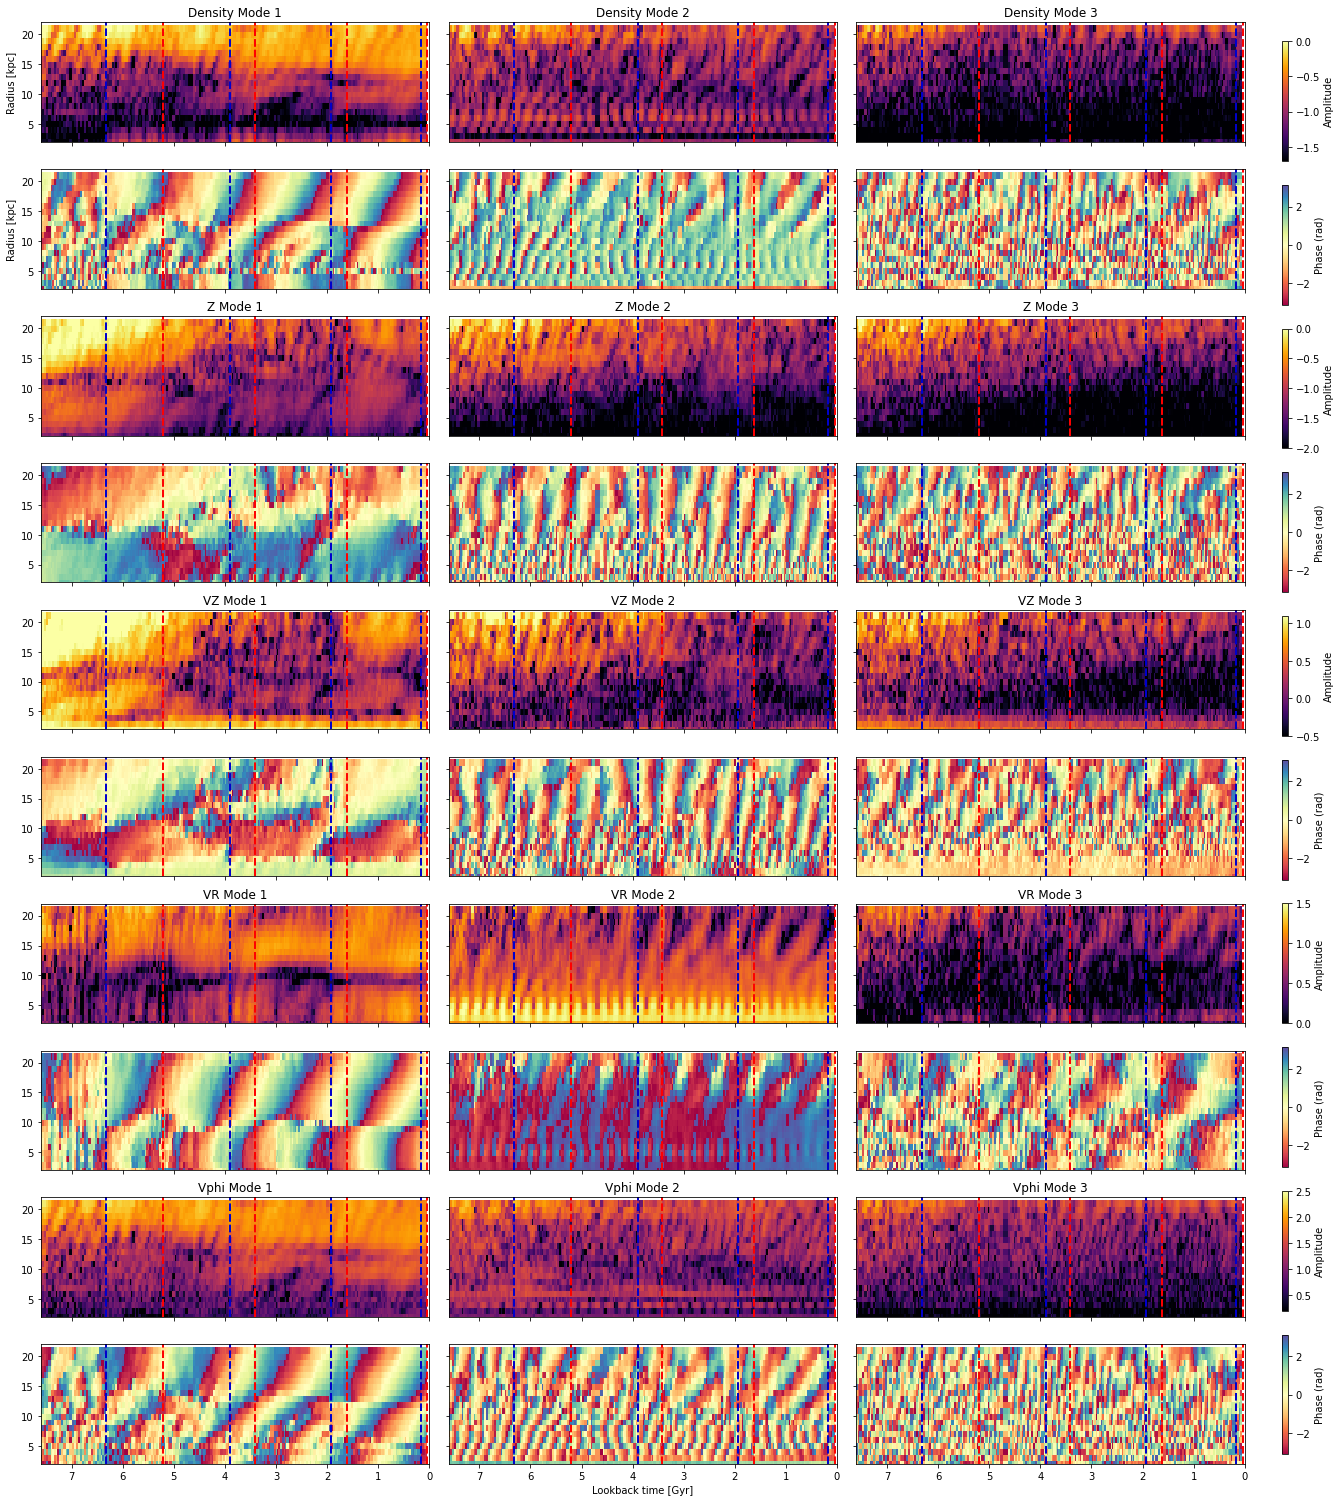

In [11]:
fig, ax = plt.subplots(nrows=2*5,ncols =3 , sharex = True,sharey = True,  figsize=(22,26))

plot_modos_fourier (density, index=0,vmin = -1.7, vmax = 0,etiqueta =  "Density",  nbins = 22)
plot_modos_fourier (z, index=1,   vmin = -2, vmax = 0, etiqueta="Z",  nbins = 22)
plot_modos_fourier (vz, index = 2, vmin = -0.5, vmax = 1.1, etiqueta="VZ",  nbins = 22)
plot_modos_fourier (vr, index = 3,vmin = 0, vmax = 1.5, etiqueta = "VR",  nbins = 22)
plot_modos_fourier (vphi, index = 4,vmin = 0.2, vmax = 2.5, etiqueta = "Vphi",  nbins = 22)
ax[9,1].set_xlabel("Lookback time [Gyr]")
ax[1,0].set_ylabel("Radius [kpc]")
ax[0,0].set_ylabel("Radius [kpc]")
plt.xlim(7.6,0)
plt.ylim(2,22)

transparencia = 0.9
tamaño = 2
#Arania
for i in range(0,10):
    for j in range(0,3):
        ax[i,j].axvline(x = 6.32, ls='--', c = "mediumblue", linewidth = tamaño, alpha = transparencia)
        ax[i,j].axvline(x = 3.90, ls='--', c = "mediumblue", linewidth = tamaño, alpha = transparencia)
        ax[i,j].axvline(x = 1.93,ls='--', c = "mediumblue", linewidth = tamaño, alpha = transparencia)
        ax[i,j].axvline(x = 0.17, ls='--', c = "mediumblue", linewidth = tamaño, alpha = transparencia)
    #Grillo
        ax[i,j].axvline(x = 5.21,ls='--', c = "red", linewidth =tamaño, alpha = transparencia)
        ax[i,j].axvline(x = 3.42,ls='--', c = "red", linewidth =tamaño, alpha = transparencia)
        ax[i,j].axvline(x = 1.62,ls='--', c = "red", linewidth =tamaño, alpha = transparencia)
        ax[i,j].axvline(x = 0.04,ls='--',c = "red", linewidth =tamaño, alpha = transparencia)

plt.subplots_adjust(left=0 ,bottom= 0.12, right=0.76, top=0.89, wspace=0.05, hspace= 0.23)
plt.savefig(path_results +"fourier_modes.png", dpi = 100, bbox_inches='tight', facecolor = "white" )


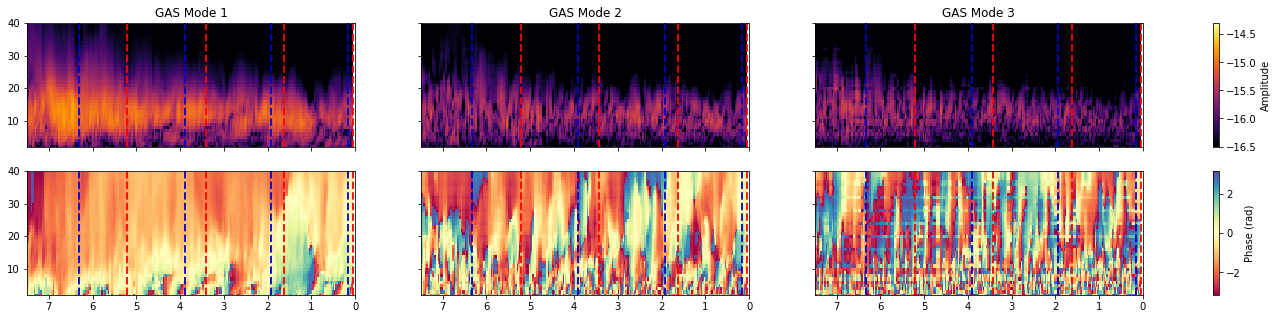

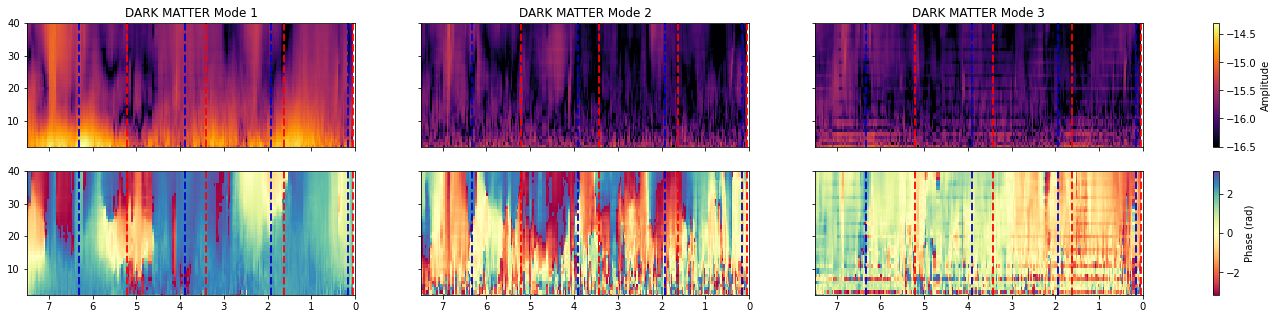

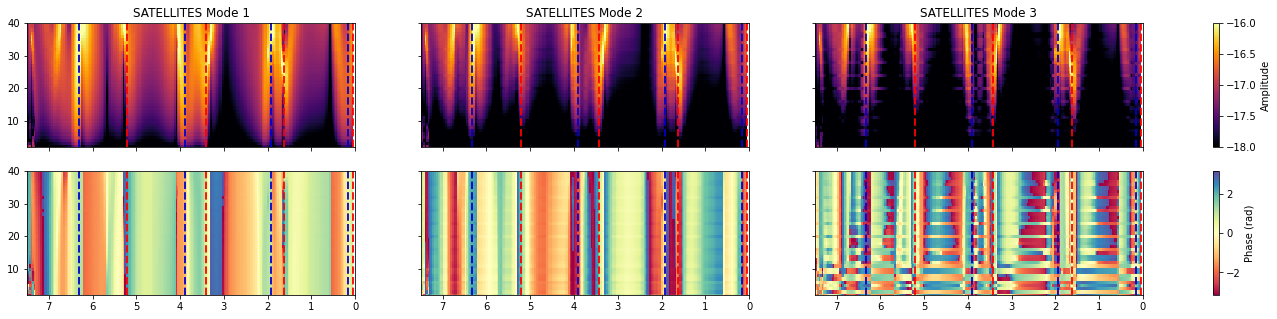

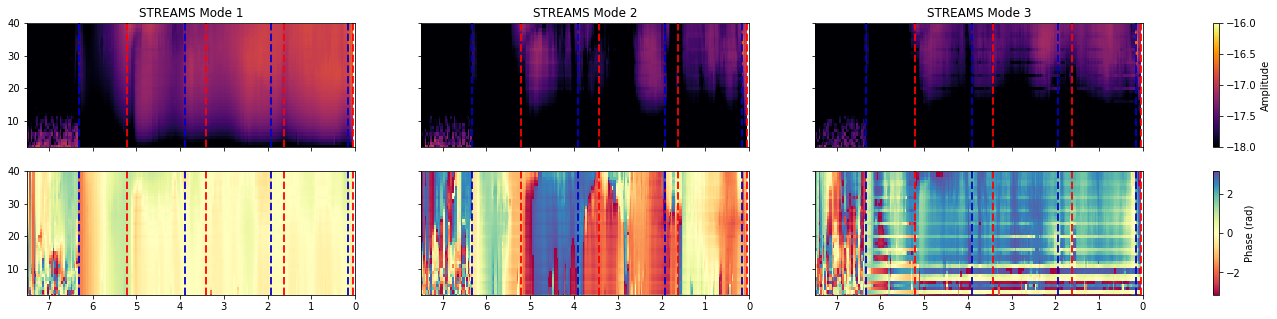

In [12]:
transparencia = 0.9
tamaño = 2

ac_dm = pd.read_csv(path_results + f"fourier_40_az_acceleration_gas.csv", sep = ",")
fig, ax = plt.subplots(nrows=2*1,ncols =3 , sharex = True,sharey = True,  figsize=(25,5))
plot_modos_fourier (ac_dm, index=0,vmin = -16.5, vmax = -14.3, etiqueta =  "GAS", nbins = 40)
plt.xlim(7.5,0)
plt.ylim(2,40)
plt.savefig(path_results +"fourier_modes_gas.png", dpi = 100, bbox_inches='tight', facecolor = "white" )



ac_dm = pd.read_csv(path_results + f"fourier_40_az_acceleration_dm.csv", sep = ",")
fig, ax = plt.subplots(nrows=2*1,ncols =3 , sharex = True,sharey = True,  figsize=(25,5))
plot_modos_fourier (ac_dm, index=0,vmin = -16.5, vmax = -14.3, etiqueta =  "DARK MATTER", nbins = 40)
plt.xlim(7.5,0)
plt.ylim(2,40)
plt.savefig(path_results +"fourier_modes_dm.png", dpi = 100, bbox_inches='tight', facecolor = "white" )


ac_sat = pd.read_csv(path_results + f"fourier_40_az_core_sat_prog.csv", sep = ",")
fig, ax = plt.subplots(nrows=2*1,ncols =3 , sharex = True,sharey = True,  figsize=(25,5))
plot_modos_fourier (ac_sat, index=0,vmin = -18, vmax = -16, etiqueta =  "SATELLITES", nbins = 40)
plt.xlim(7.5,0)
plt.ylim(2,40)
plt.savefig(path_results +"fourier_modes_satellites.png", dpi = 100, bbox_inches='tight', facecolor = "white" )


ac_sat = pd.read_csv(path_results + f"fourier_40_az_stream_sat_streams.csv", sep = ",")
fig, ax = plt.subplots(nrows=2*1,ncols =3 , sharex = True,sharey = True,  figsize=(25,5))
plot_modos_fourier (ac_sat, index=0,vmin = -18, vmax = -16, etiqueta =  "STREAMS", nbins = 40)
plt.xlim(7.5,0)
plt.ylim(2,40)
plt.savefig(path_results +"fourier_modes_streams.png", dpi = 100, bbox_inches='tight', facecolor = "white" )